<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workbook, we will develop a classification model using Decision Tree algorithm and apply it on a real world dataset

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# https://docs.google.com/spreadsheets/d/1B119SG_CQW-IhVf8HzjBjoZxhmfMUuU2vTPiD0UjzLA/edit?usp=sharing

sheet_id = "1B119SG_CQW-IhVf8HzjBjoZxhmfMUuU2vTPiD0UjzLA"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The scenario is that we are a medical researcher compiling data for a study.  you have collected dasta about a set of patients, all of whom suffered from the same disease.  during treatment, each patient responded to one of 5 meds.  we need to find out which drug works for this disease for future patients.  the features we have include age, sex, blood pressure, and cholesterol

In [5]:
# appears to be a complete dataset without nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# encoding - because 4 of the features are categorical, we have to conver into numerical for modeling

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['bp'] = label_encoder.fit_transform(df['bp'])
df['cholesterol'] = label_encoder.fit_transform(df['cholesterol'])
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [7]:
# to evaluate correlation of target variable with input features, we will map the drugs to a numerical value

custom_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['drug'] = df['drug'].map(custom_map)
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


<Axes: >

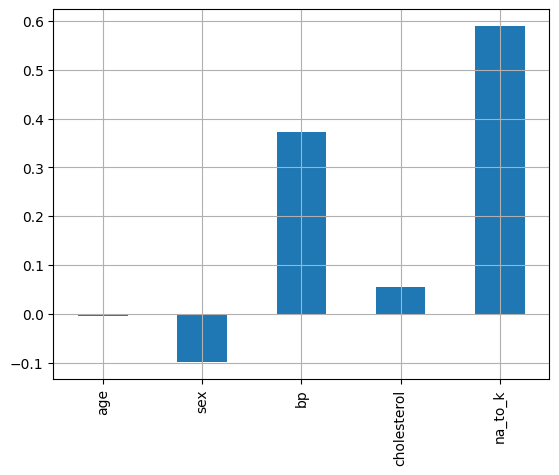

In [8]:
# evaluate hte correlation of the input variables with the target variable

df.drop('drug',axis=1).corrwith(df['drug']).plot(kind='bar',grid=True)

- the na to k and bp are the most correlated features

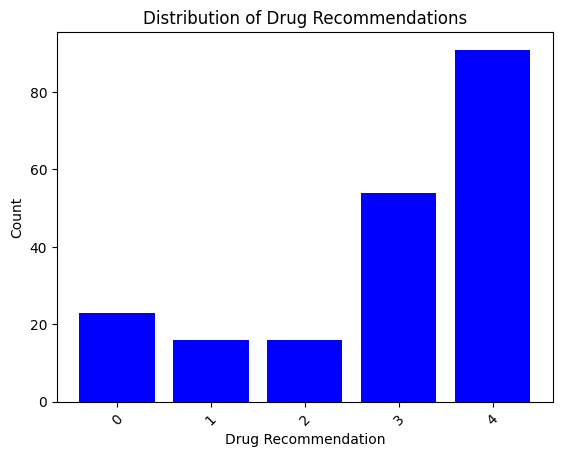

In [9]:
# we can also look at the distribution of the data by plotting the count of records with each drug recommendation

category_counts = df.drug.value_counts()

plt.bar(category_counts.index,category_counts.values, color='blue')
plt.xlabel('Drug Recommendation')
plt.ylabel('Count')
plt.title('Distribution of Drug Recommendations')
plt.xticks(rotation=45)
plt.show()
# drug x and y the majority here

In [11]:
# split up the dependent and independent variables then split the data into train and test

y = df.drug
X = df.drop('drug', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
# instantiate and fit the model
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
# evaluate

tree_predictions = drugTree.predict(X_test)
print(metrics.classification_report(y_test, tree_predictions))
print(metrics.accuracy_score(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

1.0


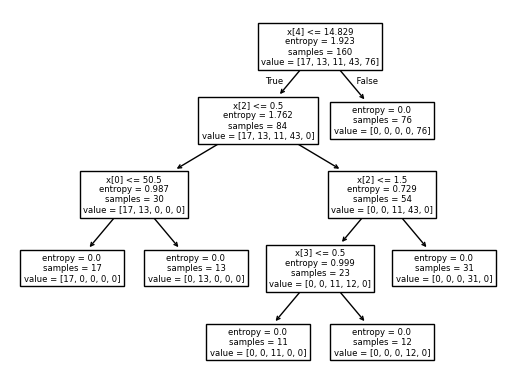

In [14]:
plot_tree(drugTree)
plt.show()

Each class (0 through 4) has perfect scores for precision, recall, and F1-score. This means:

Precision = 1.00: Every prediction the model made for each class was correct.

Recall = 1.00: The model found all instances of each class.

F1-score = 1.00: The harmonic mean of precision and recall is also perfect.

📌 Interpretation:
This model predicts the test data perfectly. That may suggest:

You have an easy-to-separate dataset,

The test set is very similar to the training set, or

There’s a risk of overfitting if the dataset is small or not diverse.

🌳 Decision Tree Interpretation
The visualization is a decision tree used to classify drug prescriptions (presumably). Here's how to read the tree:

Root node:
x[4] <= 14.829
The model starts by checking feature 4. If true (left), it proceeds; if false (right), it goes to a pure leaf (value = [0, 0, 0, 0, 76], class 4).

Entropy:
Measures impurity. An entropy of 0 means the node is pure (all one class). Higher values mean more class mixing.

Samples:
Number of observations at that node.

Value:
Class distribution. For example, [0, 0, 0, 0, 76] means all samples belong to class 4.

Deeper nodes split further on other features like x[2], x[0], etc., refining the classification.

📌 Interpretation of the Tree:

The model can perfectly separate the classes based on the input features.

The tree reaches pure leaf nodes at the end, with entropy = 0, meaning no uncertainty in predictions.

Simple thresholds on a few features are enough to classify the data — suggesting strong feature separability.

⚠️ Caution: Check for Overfitting
Perfect accuracy and fully pure leaves often signal overfitting, especially:

If your dataset is small,

If the test set is too similar to the training set.

To evaluate generalization:

Use cross-validation.

Test on a completely separate validation set.